### Machine Learning
Machine Learning é a ciência que programa computadores para que eles aprendam a partir de dados.

#### Examples of Applications
- Análise de imagens de produtos em uma liha de produção para classificá-los automaticamente. 
    - **(Image Classification)** Usando normalmente Convolutional Neutral Networks - CNN
- Detecção de tumor usando scans no cérebro
    - **(Semantic Segmentation)** Também usando CNN normalmente
- Classificando novos artigos automaticamente.
    - **(Natural Language Processing - NLP)**; **(Text Classification)**; Usando normalmente RNN, CNN ou transformers.
- Sinalizando comentários ofensivos em fórums automaticamente.
    - **(Natural Language Processing - NLP)**; **(Text Classification)**
- Sumarizando documentos longos automaticamente.
    - **(Natural Language Processing - NLP)**; **(Text Sumarization)**
- Criação de chatbots ou assistentes pessoais
    - **(Natural Language Processing - NLP)**; **(Natural Language Understanding)**
- Prever a receita da sua empresa no próximo ano, baseado em muitas métricas de performance.
    - **(Regression)**
- Detecção de fraudes de cartão de crédito
    - **(Anomaly Detection)**
- Segmentação dos clientes baseada em suas compras para que possamos arquitetar uma estratégia de marketing diferente para cada segmento.
    - **(Clustering)**
- Representação de um dataset complexo e de alta dimensão em um diagrama claro.
    - **(Dimensionality Reduction)**
- Recomendação de produtos apenas para clientes que possam estar interessados, baseado em compras passadas
    - **(Recommender System)**
- Criar um bot inteligente para um jogo.
    - **(Reinforcement Learning)**
    
#### Types of Machine Learning Systems
##### 1. Whether or not they are trained with human supervision
- **a) Supervised Learning**
    
    Aqui, o conjunto de treinamento (training set) usado para alimentar o algoritmo inclui as soluções desejadas, chamadas de **labels**.
    
    - **Classification**: Usado para prever uma **classe**. Por exemplo, em um filtro de emails spam, queremos aprender a classificar um email como spam ou não-spam.
    
    - **Regression**: Usado para inferir um valor numérico alvo (**target**) usando um conjunto de features chamados **predictors**.
    
    - Alguns dos algorítmos mas importantes de supervised learning.
        - Linear Regression
        - Polynomial Regression
        - Logistic Regression
        - Naive Bayes
        - Support Vector Machines (SVMs)
        - k-Nearest Neighbors (kNN)
        - Decision Trees
        - Random Forests
        - Neural networks.
    
- **b) Unsupervised Learning**

    Aqui, não temos as labels. Os algoritmos tentam aprender sem um "professor".
    
    - **Clustering**: Usado para agrupar dados com características semelhantes.
        - K-Means
        - DBSCAN
        - Hierarchical Cluster Aanalysis (HCS)
    
    - **Anomaly Detection and Novelty Detection**: Usado para encontrar amostras muito distoantes das demais. Muito utilizado para a detecção de falhas de uma linha de produção.
        - One-class SVM
        - Isolation Forest
    - **Dimensionality Reduction and Visualization**
        - Principal Component Analysis (PCA)
        - Kernel PCA
        - Locally Linear Embedding (LLE)
        - t-Distributed Stochastic Neighbor Embedding (t-SNE)
    - **Association rule learning**
        - Apriori
        - Eclat
- **c) Semisupervised Learning**
- **d) Reinforcement Learning**
    
##### 2. Whether or not they can learn incrementally on the fly
- **a) Online Learning**
- **b) Batch Learning**

##### 3. Whether or not they work simply by comparing new data point to known data points
- **a) Instance-based Learning**
- **b) Model-based Learning**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")

### Linear Regression

Regressão linear é o processo de ajustar uma linhas aos pontos de treino a fim de diminuir a distância desses pontos à linha.

$$\Large{y' = h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n}$$

onde $x_0$ = 1 e n representa o número de variáveis preditoras

Existe a `cost function` que sumariza o erro da hipótese.

$$\Large{J(\theta) = \frac{1}{2m} [\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2} + \lambda \sum_{j=1}^{n} \theta^2]}$$

Para ajustar a hipótese da melhor forma possível, preciso identificar qual a hipótese que me traz o menor valor para a cost function.

#### Gradient Descent
Uma das formas de conseguir os parâmetros da hipótese onde a cost function é mínima.
Existem várias outras funções que tentar calcular os parâmetros da hipótese onde a `cost function` é mínima.

**repetir até convergência {** 

$\normalsize{\theta_j := \theta_j - \alpha \frac{\delta}{\delta \theta_j}J(\theta_0, \theta_1)}$  
  
**}** para j de 0 a n

**repetir até convergência {** 

$\normalsize{\theta_0 := \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})}$

$\normalsize{\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_1^{(i)}) - y^{(i)}) x_1^{(i)}}$

$\normalsize{\theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_2^{(i)}) - y^{(i)}) x_2^{(i)}}$

$\normalsize{\theta_3 := \theta_3 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_3^{(i)}) - y^{(i)}) x_3^{(i)}}$
  
**}**


O **alpha** representa o **learning rate**.
- Se alpha é muito baixo: convergência lenta
- Se alpha é muito alto: convergência pode nunca chegar

Normalizar as features de preferência aproximadamente -1 e 1.

$\Large{x_i := \frac{x_i - \mu}{std}}$ ou $\Large{x_i := \frac{x_i - min(x)}{range(x)}}$ ou $\Large{x_i := \frac{x_i - \mu}{range(x)}}$

##### Solving the Problem of Overfitting

- **Underfitting** = High Bias
- **Overfitting** = High Variance

1. **Reduzindo o número de features**
    - Verificar quais features usar 
    - Use algoritmos de feature selection
    
    
2. **Regularização**
    - Mantém todas as features, mas reduz a magnitude dos parâmetros $\theta$ 
    - Regularização funciona bem quando we have a lot of slightly useful features

In [2]:
mm_scaler = MinMaxScaler(feature_range=(-1, 1))

X = np.c_[np.array([1, 90, 900, 80, 80, -909, 903, 391289, 9210, 3989, 3209809, -90, -90322, -238928398])]

X_transform = mm_scaler.fit_transform(X)
X_transform

array([[ 0.9734878 ],
       [ 0.97348854],
       [ 0.97349523],
       [ 0.97348845],
       [ 0.97348845],
       [ 0.97348029],
       [ 0.97349525],
       [ 0.97671974],
       [ 0.97356387],
       [ 0.97352074],
       [ 1.        ],
       [ 0.97348705],
       [ 0.97274176],
       [-1.        ]])

### Regressão Linear para 1 Váriavel

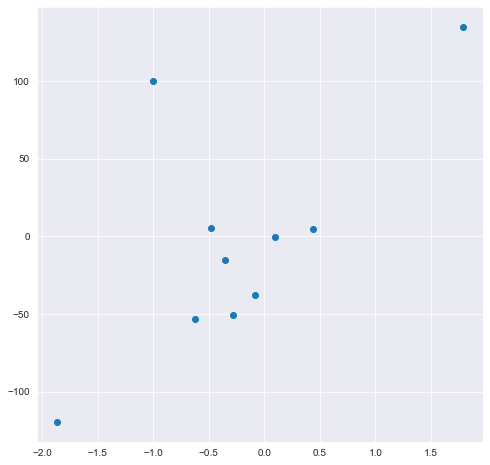

In [5]:
data = datasets.make_regression(
    n_samples=10, 
    n_features=1, 
    n_informative=1, 
    n_targets=1, 
    noise=20,
    random_state=3
)

df = pd.DataFrame({"x": data[0].flatten(), "y": data[1].tolist()})
df.sample(3)

df.loc[9, :] = [-1, 100]

plt.figure(figsize=(8, 8))

plt.scatter(df["x"], df["y"]);

In [12]:
lr = LinearRegression()

X = np.c_[df.x]
y = df.y

lr.fit(X, y)

LinearRegression()

In [13]:
Xplot = np.array([
    [-2],
    [2]
])

yplot = lr.predict(Xplot)

Xplot, yplot

(array([[-2],
        [ 2]]),
 array([-92.47316061, 109.8882757 ]))

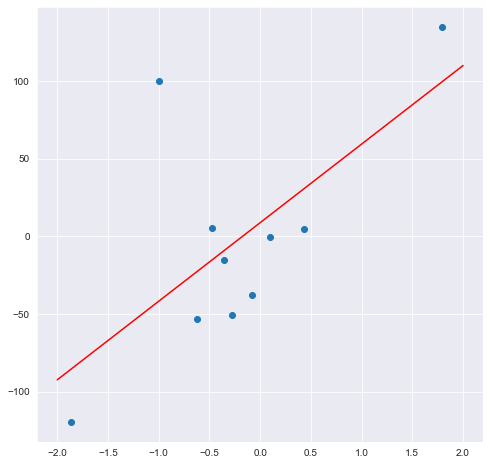

In [14]:
plt.figure(figsize=(8, 8))

plt.scatter(df["x"], df["y"])
plt.plot(Xplot.flatten(), yplot, color="red");

### Regressão Linear para Múltiplas Váriaveis

In [15]:
X, y = datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

print(lr2.score(X_train, y_train))
print(lr2.score(X_test, y_test))
print(np.round(mean_squared_error(y_train, y_pred_train), 2))
print(np.round(mean_squared_error(y_test, y_pred_test), 2))

0.5279198995709651
0.452606602161738
2868.55
2900.17


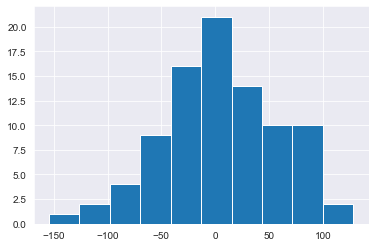

In [8]:
results_lr = pd.DataFrame(data=np.c_[y_test, y_pred_test], columns=["y_true", "y_pred"])
results_lr["diff"] = results_lr["y_true"] - results_lr["y_pred"]

plt.hist(results_lr["diff"]);

### Polynomial Regression

In [40]:
PolynomialFeatures(degree)

PolynomialFeatures(degree=10)

In [38]:
results = {"degree": [], "train_mean_squared_error": [], "test_mean_squared_error": []}

degrees = [1, 2, 3, 4, 5, 10]
for degree in degrees:
    X_poly = PolynomialFeatures(degree).fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    pr = Ridge(alpha=0)
    pr.fit(X_train, y_train)
    
    y_pred_train = pr.predict(X_train)
    y_pred_test = pr.predict(X_test)

    error_train = np.round(mean_squared_error(y_train, y_pred_train), 3)
    error_test = np.round(mean_squared_error(y_test, y_pred_test), 3)
    
    results["degree"].append(degree)
    results["train_mean_squared_error"].append(error_train)
    results["test_mean_squared_error"].append(error_test)
    
    
pd.DataFrame(results)

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.44884e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.88474e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


,degree,train_mean_squared_error,test_mean_squared_error
0,1,2868.547,2900.173
1,2,2393.155,3095.775
2,3,745.321,97681.252
3,4,0.000,146911.274
4,5,0.000,143015.840
5,10,0.000,142923.746
